# Projeto de Análise de Dados
### Desenvolvido por [Ian Rodrigues dos Reis Paixão]

Este notebook foi criado por **[Ian Rodrigues dos Reis Paixão]**   
**Data de Criação:** [26/12/2024]  
**Contato:** [iang.master100@gmail.com]

O objetivo é realizar uma análise detalhada de um conjunto de dados fictício de vendas, extraindo insights úteis e gerando previsões de faturamento futuro. As etapas do problema incluem:

Limpeza e preparação de dados: Garantir que o conjunto de dados esteja pronto para análise.
Análise temporal: Observar a evolução do faturamento ao longo dos dias.
Análise por categoria: Identificar o faturamento total por categoria e destacar os produtos mais vendidos em cada categoria.
Previsão de vendas futuras: Utilizar modelos de aprendizado de máquina para prever o faturamento dos próximos 7 dias.
Geração de relatório: Consolidar os resultados em um arquivo Excel.


Dados Iniciais:
         data    categoria   produto  quantidade  preco_unitario
0  2024-01-01  Eletrônicos   Celular           5            1500
1  2024-01-01  Eletrônicos  Notebook           3            3000
2  2024-01-02       Móveis      Mesa           2             400
3  2024-01-02       Móveis   Cadeira           4             200
4  2024-01-03  Eletrônicos    Tablet           7            1200
5  2024-01-03       Móveis      Sofá           1            1500
Dados Após Limpeza:
        data    categoria   produto  quantidade  preco_unitario  faturamento
0 2024-01-01  Eletrônicos   Celular           5          1500.0       7500.0
1 2024-01-01  Eletrônicos  Notebook           3          3000.0       9000.0
2 2024-01-02       Móveis      Mesa           2           400.0        800.0
3 2024-01-02       Móveis   Cadeira           4           200.0        800.0
4 2024-01-03  Eletrônicos    Tablet           7          1200.0       8400.0
5 2024-01-03       Móveis      Sofá           1

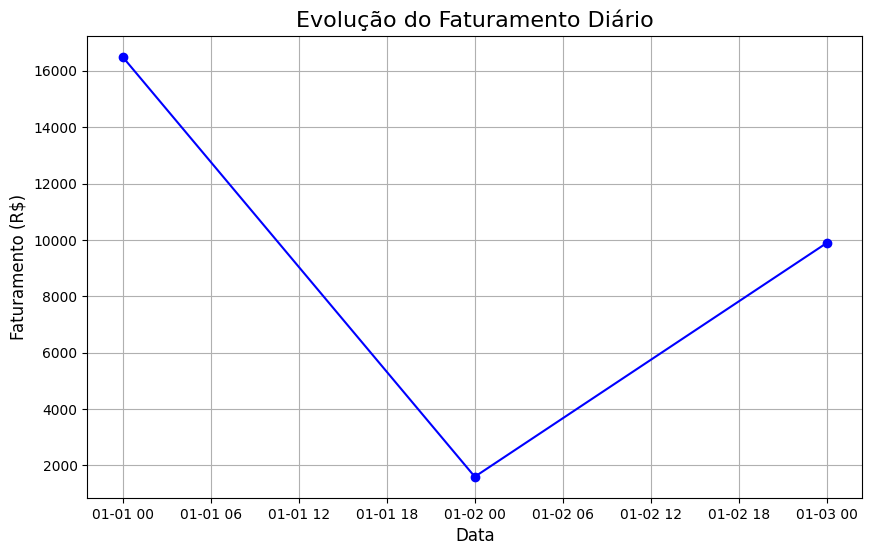

Faturamento por Categoria:
     categoria  faturamento
0  Eletrônicos      24900.0
1       Móveis       3100.0
Resumo por Categoria:
     categoria  faturamento_total produto_mais_vendido  faturamento_produto
0  Eletrônicos            24900.0             Notebook               9000.0
1       Móveis             3100.0                 Sofá               1500.0


Erro Médio Absoluto (MAE): 23200.00
Previsão para os Próximos 7 Dias:
        data  faturamento_previsto
0 2024-01-04               18200.0
1 2024-01-05               26500.0
2 2024-01-06               34800.0
3 2024-01-07               43100.0
4 2024-01-08               51400.0
5 2024-01-09               59700.0
6 2024-01-10               68000.0
Relatório salvo no arquivo 'relatorio_vendas.xlsx'.


In [ ]:
# # Análise de Dados de Vendas



## **1. Importação de Bibliotecas**


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error




## **2. Dados Fictícios**


dados = {
    "data": ["2024-01-01", "2024-01-01", "2024-01-02", "2024-01-02", "2024-01-03", "2024-01-03"],
    "categoria": ["Eletrônicos", "Eletrônicos", "Móveis", "Móveis", "Eletrônicos", "Móveis"],
    "produto": ["Celular", "Notebook", "Mesa", "Cadeira", "Tablet", "Sofá"],
    "quantidade": [5, 3, 2, 4, 7, 1],
    "preco_unitario": [1500, 3000, 400, 200, 1200, 1500],
}

# Criar o DataFrame
df = pd.DataFrame(dados)
print("Dados Iniciais:")
print(df)

## **3. Limpeza e Preparação de Dados**


# Tratar valores ausentes
df.fillna(0, inplace=True)

# Ajustar tipos de dados
df["data"] = pd.to_datetime(df["data"])
df["quantidade"] = df["quantidade"].astype(int)
df["preco_unitario"] = df["preco_unitario"].astype(float)

# Calcular faturamento
df["faturamento"] = df["quantidade"] * df["preco_unitario"]

print("Dados Após Limpeza:")
print(df)


## **4. Análise Temporal**

### **4.1 Faturamento Diário**


faturamento_diario = df.groupby("data")["faturamento"].sum().reset_index()

print("Faturamento Diário:")
print(faturamento_diario)


### **4.2 Gráfico de Linha do Faturamento Diário**


plt.figure(figsize=(10, 6))
plt.plot(faturamento_diario["data"], faturamento_diario["faturamento"], marker="o", color="blue")
plt.title("Evolução do Faturamento Diário", fontsize=16)
plt.xlabel("Data", fontsize=12)
plt.ylabel("Faturamento (R$)", fontsize=12)
plt.grid(True)
plt.show()


## **5. Análise por Categoria**

### **5.1 Faturamento Total por Categoria**


faturamento_categoria = df.groupby("categoria")["faturamento"].sum().reset_index()
print("Faturamento por Categoria:")
print(faturamento_categoria)


### **5.2 Produto Mais Vendido por Categoria**


produto_top = df.loc[df.groupby("categoria")["faturamento"].idxmax(), ["categoria", "produto", "faturamento"]]
produto_top.rename(columns={"produto": "produto_mais_vendido", "faturamento": "faturamento_produto"}, inplace=True)

# Combinar informações
resultado_categoria = faturamento_categoria.merge(produto_top, on="categoria")
resultado_categoria.rename(columns={"faturamento": "faturamento_total"}, inplace=True)
print("Resumo por Categoria:")
print(resultado_categoria)


### **5.3 Gráfico Interativo por Categoria**


fig = px.bar(faturamento_categoria, x="categoria", y="faturamento",
             title="Faturamento por Categoria", labels={"faturamento": "Faturamento (R$)", "categoria": "Categoria"})
fig.show()


## **6. Previsão de Vendas Futuras**

### **6.1 Preparação dos Dados para Previsão**


# Adicionar coluna de sequência temporal
faturamento_diario["dia"] = np.arange(len(faturamento_diario))
X = faturamento_diario[["dia"]]
y = faturamento_diario["faturamento"]

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### **6.2 Treinamento do Modelo**


modelo = LinearRegression()
modelo.fit(X_train, y_train)


### **6.3 Avaliação do Modelo**


y_pred = modelo.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f"Erro Médio Absoluto (MAE): {mae:.2f}")


### **6.4 Previsões para os Próximos 7 Dias**


dias_futuros = pd.DataFrame({"dia": np.arange(len(faturamento_diario), len(faturamento_diario) + 7)})
previsoes = modelo.predict(dias_futuros)
previsoes_df = pd.DataFrame({"data": pd.date_range(start=faturamento_diario["data"].max() + pd.Timedelta(days=1), periods=7),
                             "faturamento_previsto": previsoes})
print("Previsão para os Próximos 7 Dias:")
print(previsoes_df)

## **7. Exportação dos Resultados**

with pd.ExcelWriter("relatorio_vendas.xlsx") as writer:
    faturamento_diario.to_excel(writer, sheet_name="Faturamento_Diario", index=False)
    resultado_categoria.to_excel(writer, sheet_name="Faturamento_Categoria", index=False)
    previsoes_df.to_excel(writer, sheet_name="Previsao_Faturamento", index=False)

print("Relatório salvo no arquivo 'relatorio_vendas.xlsx'.")
